<a href="https://colab.research.google.com/github/jonnie763/DATA-690-WANG/blob/master/Jonathan_Rius_Deliverable_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**1. Background information-Venezuela**
Venezuela has an interesting history. Present day and historic Venezuela has many points of analysis. One can approach Venezuela, from a political or historical perspective. Others can choose to explore it from an economic or governmental perspective. What I think is most interesting is approaching it from a data perspective, and to infer and answer important economic, political, and governmental questions from there. Below are other facts about Venezuela,  some relevant and others just intriguing for the reader.



*   Venezeula one and only democratic institution is called the National Assembly  
*   Venezeula has a tropical climate, hot and humid 
*   Venezeula is about twice the size of California 
*   Venezeula has a population of around 30 million, its offical lanaguage is Spanish 
*   Venezuela's prevailing party is the United Socialist Party of Venezuela 

##**2.Country Analysis- Data Cleanse**

##**2a) Data Cleanse- GDP**

### Import Libraries 

In [ ]:
import matplotlib.pyplot as plt        #Import relevant libraries. Pandas for dataframes and ploty and matplotlib for visualization. Other libraries just in case.  
import pandas as pd 
import numpy as np
import plotly.graph_objects as go
plt.rcParams['figure.figsize'] = 25, 12 #Increase general size for matplot.lib


###**GDP-Web Scrape**

In [ ]:
GDP_df= pd.read_html("https://www.imf.org/en/Publications/WEO/weo-database/2020/October/weo-report?c=233,336,299,&s=NGDP_RPCH,&sy=2015&ey=2020&ssm=0&scsm=1&scc=0&ssd=1&ssc=0&sic=0&sort=country&ds=.&br=1") # Webscrape IMF site, great site for economic data, in general   
GDP_df = GDP_df[0] # Save the variable as GDP_df
GDP_df


,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,2016,2017,2018,2019,2020
0,Colombia,"Gross domestic product, constant prices",Percent change,NaN,NaN,2.956,2.087,1.359,2.515,3.260,-8.182
1,Guyana,"Gross domestic product, constant prices",Percent change,NaN,NaN,0.687,3.807,3.734,4.441,5.353,26.205
2,Venezuela,"Gross domestic product, constant prices",Percent change,NaN,NaN,-6.221,-17.040,-15.671,-19.621,-35.000,-25.000


In [ ]:
GDP_df=GDP_df.drop(columns=['Subject Descriptor',"Units","Scale","Country/Series-specific Notes"]) # Data Cleaning, don't need these columns 
GDP_df

,Country,2015,2016,2017,2018,2019,2020
0,Colombia,2.956,2.087,1.359,2.515,3.260,-8.182
1,Guyana,0.687,3.807,3.734,4.441,5.353,26.205
2,Venezuela,-6.221,-17.040,-15.671,-19.621,-35.000,-25.000


### **GDP-Create Year List to Insert in Dataframe**

In [ ]:
Years= list(GDP_df) # Listing years for dataframe piviot, take out Country with remove 
Years

['Country', '2015', '2016', '2017', '2018', '2019', '2020']

In [ ]:
Years.remove('Country') # Take out Country String from list 
Years

['2015', '2016', '2017', '2018', '2019', '2020']

###**GDP- Data Frame Long Pivot**

In [ ]:
long_df_Countries = GDP_df.melt(
    id_vars="Country",                         # Unique identifier
    value_vars=Years,                          # List of columns to be melted to a single variable
    var_name="Years",                          # The new column name for the variable
    value_name="GDP Percentage Growth"         # The new column name for the value
)

long_df_Countries

,Country,Years,GDP Percentage Growth
0,Colombia,2015,2.956
1,Guyana,2015,0.687
2,Venezuela,2015,-6.221
3,Colombia,2016,2.087
4,Guyana,2016,3.807
5,Venezuela,2016,-17.040
6,Colombia,2017,1.359
7,Guyana,2017,3.734
8,Venezuela,2017,-15.671
9,Colombia,2018,2.515


### **GDP- Interactive Bar Graph with Plotly**

In [ ]:
import plotly.express as px                                                                         # Chose plotly for interactive graph 
fig = px.bar(long_df_Countries, x="Years", y="GDP Percentage Growth", color= "Country")             # Taken from dataframe 

fig.update_layout(                                                                                  # Increase size of graph, increasing legend size, and some font size. That code is below.                                                             
    autosize=False,
    width=1500,
    height=800,)

fig.update_layout(
legend=go.layout.Legend(
x=0,
y=1,
traceorder="normal",
font=dict(
family="sans-serif",
size=20,
color="black"
)
)
)

fig.update_layout(title_text="Venezuela's Shrinking Economy vs Neighboring Countries", title_x=0.5) # Add title "Venezuela's Shrinking Economy vs Neighboring Countries"



fig.show()




##**2b) Data Cleanse- Inflation**

### **Inflation- Web Scrape**

In [ ]:
Inflation_df= pd.read_html("https://www.imf.org/en/Publications/WEO/weo-database/2020/October/weo-report?c=299,&s=PCPIPCH,&sy=1990&ey=2020&ssm=0&scsm=1&scc=0&ssd=1&ssc=0&sic=0&sort=country&ds=.&br=1") #Web scrape for inflation rate, create a dataframe 
Inflation_df = Inflation_df[0]
Inflation_df

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Venezuela,"Inflation, average consumer prices",Percent change,NaN,NaN,40.656,34.205,31.423,38.122,60.817,59.923,99.876,50.04,35.782,23.57,16.206,12.531,22.434,31.091,21.747,15.955,13.663,18.699,31.441,26.041,28.187,26.09,21.069,40.639,62.169,121.738,254.949,438.117,65374.082,19906.024,6500.0


In [ ]:
Inflation_df=Inflation_df.drop(columns=['Subject Descriptor',"Units","Scale","Country/Series-specific Notes"]) # Data Cleaning, don't need these columns
Inflation_df

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Venezuela,40.656,34.205,31.423,38.122,60.817,59.923,99.876,50.04,35.782,23.57,16.206,12.531,22.434,31.091,21.747,15.955,13.663,18.699,31.441,26.041,28.187,26.09,21.069,40.639,62.169,121.738,254.949,438.117,65374.082,19906.024,6500.0


In [ ]:
years= list(Inflation_df) # Listing years for dataframe piviot, take out Country with remove from list
years

['Country',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020']

In [ ]:
years.remove('Country') #I need to remove the string because it will prevent from using the pivot to long df
years

['1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020']

### **Inflation- Data frame Long Pivot**

In [ ]:
long_df_Inflation = Inflation_df.melt(
    id_vars="Country",                         # Unique identifier
    value_vars=years,                          # List of columns to be melted to a single variable
    var_name="Years",                          # The new column name for the variable
    value_name="Inflation Rate"                # The new column name for the value
)

long_df_Inflation

,Country,Years,Inflation Rate
0,Venezuela,1990,40.656
1,Venezuela,1991,34.205
2,Venezuela,1992,31.423
3,Venezuela,1993,38.122
4,Venezuela,1994,60.817
5,Venezuela,1995,59.923
6,Venezuela,1996,99.876
7,Venezuela,1997,50.040
8,Venezuela,1998,35.782
9,Venezuela,1999,23.570


### **Inflation- Interactive Line Graph with Plotly**

In [ ]:
import plotly.express as px                                        # This is very similar to the bar graph interactive, however not is a line. Like before, font sizes are increased when needed. 
fig = px.line(long_df_Inflation, x="Years", y="Inflation Rate")

fig.update_layout(
    autosize=False,
    width=1500,
    height=800,)

fig.update_layout(                                                  # Simply put this code is to change the font, title, and legend. Like before.   
legend=go.layout.Legend(
x=0,
y=1,
traceorder="normal",
font=dict(
family="sans-serif",
size=20,
color="black"
)
)
)

fig.update_layout(title_text="Venzuela Inflation Rate", title_x=0.5)


fig.show()

### **Inflation- Timeline Graph of Data Frame**

Text(0.1, 60000, 'Increase in money supply= Inflation')

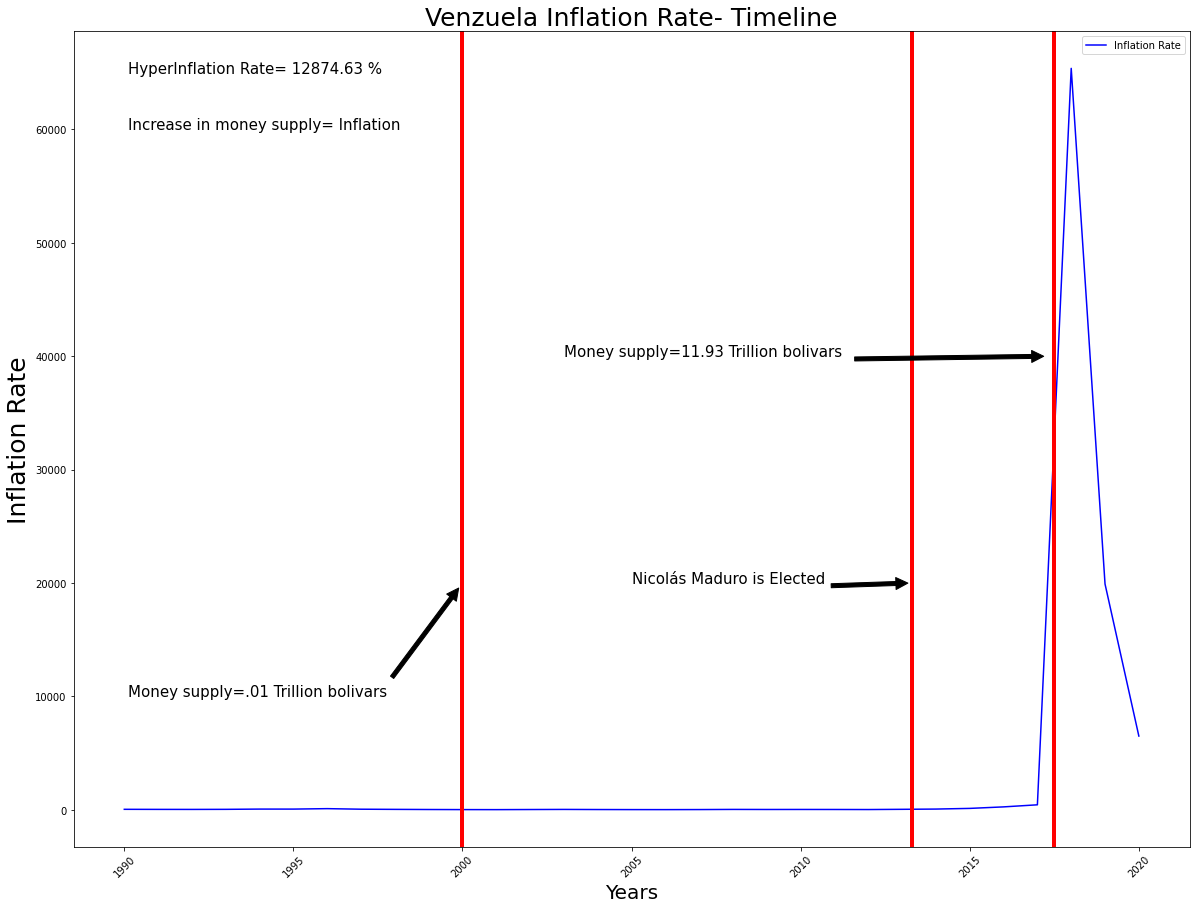

In [ ]:
#http://fingfx.thomsonreuters.com/gfx/rngs/VENEZUELA-ECONOMY/010040800HY/index.html


fig, ax = plt.subplots(figsize=(20,15))                          # This graph is not interactive I made it timelined to show how money supply causes inflation to go up 
ax.set_ylabel("Inflation Rate",fontname="Arial", fontsize=25)    # Font size increase 
ax.set_xlabel("Years",fontname="Arial", fontsize=20)
ax.set_title("Venzuela Inflation Rate- Timeline",fontname="Arial", fontsize=25)
long_df_Inflation.plot(kind='line',x='Years',y='Inflation Rate', legend= "GDP Percentage Growth", color="b", rot=45, ax = ax) # This plots the dataframe created from the pivot, money supply data based on link above  

plt.axvline(x=23.3,linewidth=4, color='r')                                                             # Give appearance of timeline 

plt.axvline(x=27.5,linewidth=4, color='r')                                                             # Give appearance of timeline 

plt.axvline(x=10,linewidth=4, color='r')                                                               # Give appearance of timeline 

ax.annotate('Nicolás Maduro is Elected' ,fontsize=15, xy=(23.3, 20000), xytext=(15, 20000),            # Timelined Maduro using line inserted 
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('Money supply=11.93 Trillion bolivars' ,fontsize=15, xy=(27.5, 40000), xytext=(13, 40000), # Timelined Money supply is very high using line inserted
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('Money supply=.01 Trillion bolivars' ,fontsize=15, xy=(10, 20000), xytext=(.1, 10000),     # Timelined Money supply is very low using line inserted
            arrowprops=dict(facecolor='black', shrink=0.05))
       
plt.text(.1, 65000, r'HyperInflation Rate= 12874.63 %' ,fontsize=15)                                   # Shows hyperinflation rate 

plt.text(.1, 60000, r'Increase in money supply= Inflation' ,fontsize=15)                               # Shows "Increase in money supply= Inflation"

##**2c) Data Cleanse- Poverty**

### **Poverty- Find Source then Bar Graph**

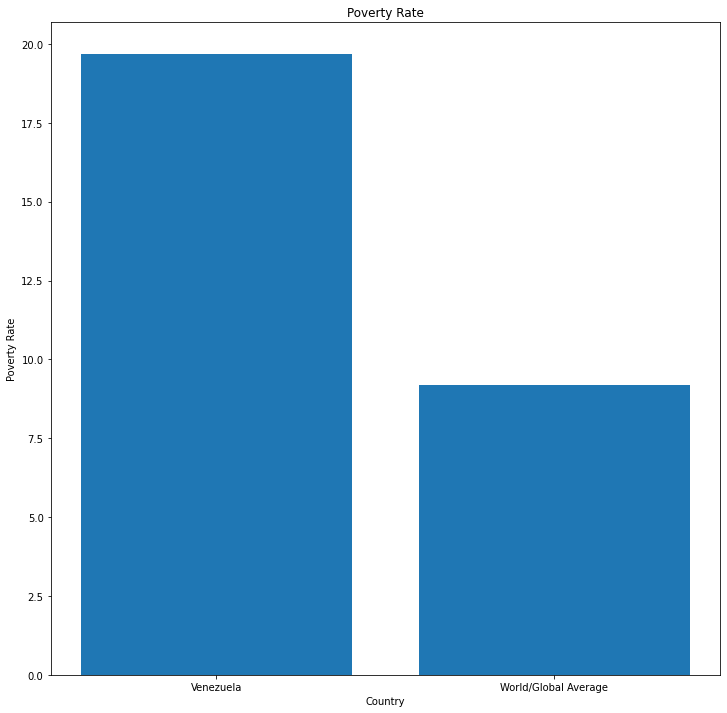

In [ ]:
Poverty_Rate  = [19.7,9.2]                       #https://www.worldbank.org/en/topic/poverty/overview#:~:text=The%20global%20extreme%20poverty%20rate,%245.50%20a%20day%20in%202017
Country = ["Venezuela",	"World/Global Average"]  # Made my own dataframe, only needed two data points, no need for web scarping and csv, data is based off above link  
Poverty_Rate

fig, ax = plt.subplots(figsize=(12,12))

ax.bar(Country, Poverty_Rate)
ax.set_title("Poverty Rate")
ax.set_xlabel("Country")
ax.set_ylabel("Poverty Rate")

fig.show()

##**2d) Data Cleanse- Trade**

### **Trade- Web Scrape**

In [ ]:
Trade_df= pd.read_html("https://www.imf.org/en/Publications/WEO/weo-database/2020/October/weo-report?c=299,&s=TMG_RPCH,&sy=1990&ey=2020&ssm=0&scsm=1&scc=0&ssd=1&ssc=0&sic=0&sort=country&ds=.&br=1") #Web scrape for Import change, create a dataframe 
Trade_df = Trade_df[0]
Trade_df

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Venezuela,Volume of Imports of goods,Percent change,NaN,NaN,2.447,25.24,4.752,-11.738,-28.4,31.011,-15.485,62.421,14.298,-11.449,14.985,15.789,-28.215,-23.457,66.582,38.777,40.169,31.575,3.187,-21.528,-6.101,13.803,24.948,-9.687,-18.532,-23.102,-50.061,-34.651,-10.074,-33.14,-14.796


In [ ]:
Trade_df=Trade_df.drop(columns=['Subject Descriptor',"Units","Scale","Country/Series-specific Notes"]) # Similar data cleanse as before, drop columns 
Trade_df

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Venezuela,2.447,25.24,4.752,-11.738,-28.4,31.011,-15.485,62.421,14.298,-11.449,14.985,15.789,-28.215,-23.457,66.582,38.777,40.169,31.575,3.187,-21.528,-6.101,13.803,24.948,-9.687,-18.532,-23.102,-50.061,-34.651,-10.074,-33.14,-14.796


In [ ]:
Years= list(Trade_df) # Generate list 
Years

['Country',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020']

In [ ]:
Years.remove('Country') # Similar data cleanse as before, drop string Country
Years

['1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020']

### **Trade- Data frame Long Pivot/ Import Growth Rate**

In [ ]:
long_df = Trade_df.melt(
    id_vars="Country",                         # Unique identifier
    value_vars=Years,                          # List of columns to be melted to a single variable
    var_name="Years",                          # The new column name for the variable
    value_name="Imports Growth Rate"           # The new column name for the value
)

long_df

,Country,Years,Imports Growth Rate
0,Venezuela,1990,2.447
1,Venezuela,1991,25.240
2,Venezuela,1992,4.752
3,Venezuela,1993,-11.738
4,Venezuela,1994,-28.400
5,Venezuela,1995,31.011
6,Venezuela,1996,-15.485
7,Venezuela,1997,62.421
8,Venezuela,1998,14.298
9,Venezuela,1999,-11.449


### **Trade- Filter rows by Years** 

In [ ]:
start = '2012'
end = '2020'

l = list(long_df['Years'])                   #ordered list of names
subl = l[l.index(start):l.index(end)+1]      #list of names between the start and end

long_df[long_df['Years'].isin(subl)]         #filter dataset for list of names
long_df=long_df[long_df['Years'].isin(subl)] #filter dataset for list of names
long_df

,Country,Years,Imports Growth Rate
22,Venezuela,2012,24.948
23,Venezuela,2013,-9.687
24,Venezuela,2014,-18.532
25,Venezuela,2015,-23.102
26,Venezuela,2016,-50.061
27,Venezuela,2017,-34.651
28,Venezuela,2018,-10.074
29,Venezuela,2019,-33.140
30,Venezuela,2020,-14.796


### **Trade- Line graph of Data Frame**

Text(3, 4, 'U.S Sanctions')

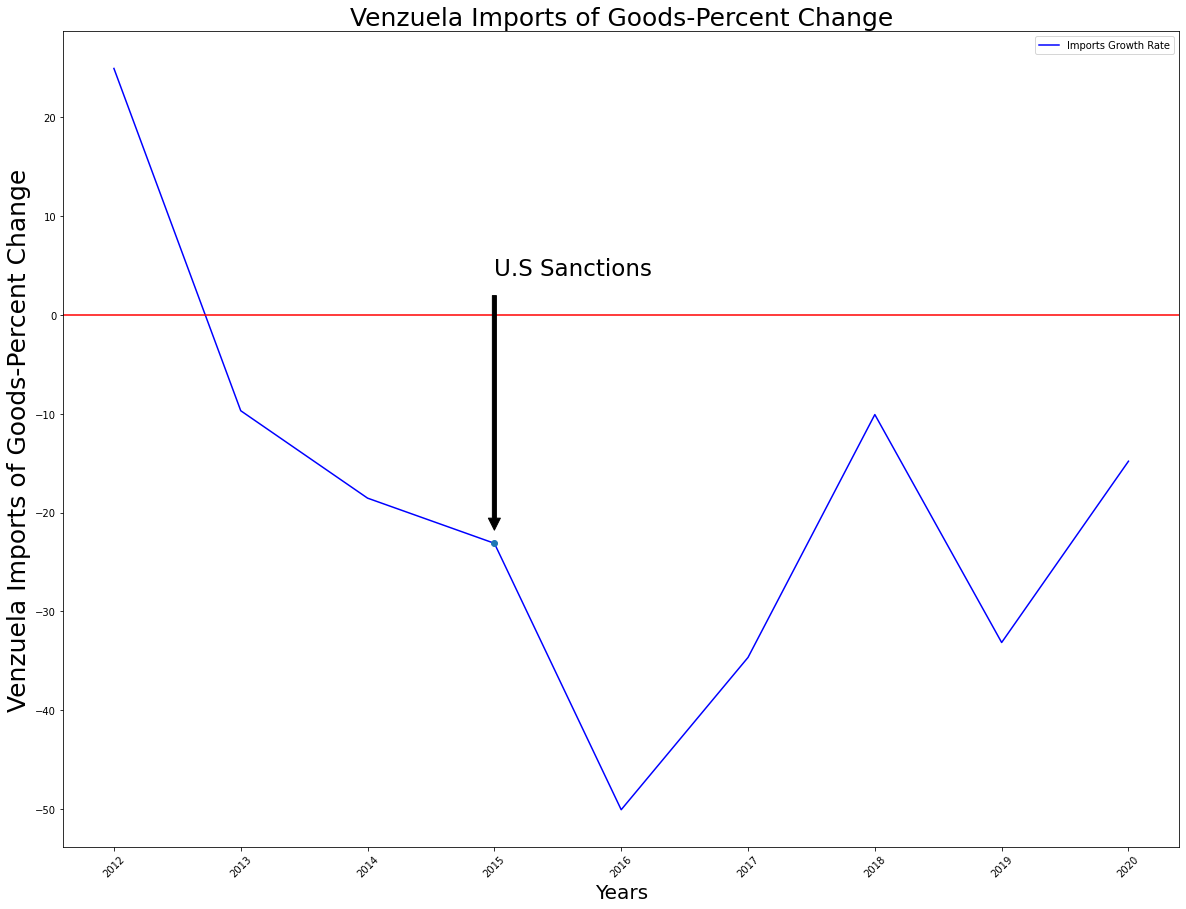

In [ ]:
import numpy as np
fig, ax = plt.subplots(figsize=(20,15))
ax.set_ylabel("Venzuela Imports of Goods-Percent Change",fontname="Arial", fontsize=25)
ax.set_xlabel("Years",fontname="Arial", fontsize=20)
ax.set_title("Venzuela Imports of Goods-Percent Change",fontname="Arial", fontsize=25)
long_df.plot(kind="line",x="Years",y="Imports Growth Rate", legend= "GDP Percentage Growth", color="b", rot=45, ax = ax)


plt.axhline(y=0, color='r')                                               # I think inserting the x-axis is helpful 


ax.plot([3], [-23.102], 'o')                                              # Create annoations to identify U.S Sanctions 
ax.annotate('U.S Sanctions' ,fontsize=23, xy=(3, -23.102), xytext=(3, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))


##**2e) Data Cleanse- Education**

### **Web Scrape of Education Spending (World)**

In [ ]:
Education_df = pd.read_csv("/content/DP_LIVE_25102020061630321.csv") # Read csv using this code, print df
Education_df 

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUT,EDUEXP,TRY,USD_STUDENT,A,2015,17555.235,NaN
1,AUT,EDUEXP,TRY,USD_STUDENT,A,2016,NaN,M
2,CZE,EDUEXP,TRY,USD_STUDENT,A,2015,10890.714,NaN
3,CZE,EDUEXP,TRY,USD_STUDENT,A,2016,NaN,M
4,FRA,EDUEXP,TRY,USD_STUDENT,A,2015,16144.755,NaN
...,...,...,...,...,...,...,...,...
179,SAU,EDUEXP,EARLYCHILDEDU,USD_STUDENT,A,2016,NaN,M
180,SVN,EDUEXP,EARLYCHILDEDU,USD_STUDENT,A,2015,8610.292,NaN
181,SVN,EDUEXP,EARLYCHILDEDU,USD_STUDENT,A,2016,NaN,M
182,ZAF,EDUEXP,EARLYCHILDEDU,USD_STUDENT,A,2015,NaN,M


In [ ]:
Education_df.drop(columns=['INDICATOR',"SUBJECT","MEASURE", 'FREQUENCY','TIME',"Flag Codes"])
Education_df =Education_df .drop(columns=['INDICATOR',"SUBJECT","MEASURE", 'FREQUENCY','TIME',"Flag Codes"]) # Similar data cleanse as before, drop columns 
Education_df 

,LOCATION,Value
0,AUT,17555.235
1,AUT,NaN
2,CZE,10890.714
3,CZE,NaN
4,FRA,16144.755
...,...,...
179,SAU,NaN
180,SVN,8610.292
181,SVN,NaN
182,ZAF,NaN


### **Filter by sorting Value**

In [ ]:
# sort - ascending order
import pandas as pd
 

Education_df .sort_values(by=['Value'], inplace=True) # Similar data cleanse as before, but sorting value in order 
Education_df 

,LOCATION,Value
168,IDN,169.575
126,MEX,2684.695
146,TUR,3591.292
62,IDN,3764.700
68,GRC,4094.526
...,...,...
178,SAU,NaN
179,SAU,NaN
181,SVN,NaN
182,ZAF,NaN


### **Remove duplicates (Location) within dataframe**

In [ ]:
Education_df.drop_duplicates(subset=['LOCATION'])
Education_df=Education_df .drop_duplicates(subset=['LOCATION']) # Similar data cleanse as before, drop repeating/duplicate locations 
Education_df 

,LOCATION,Value
168,IDN,169.575
126,MEX,2684.695
146,TUR,3591.292
68,GRC,4094.526
170,ISR,4185.221
100,CZE,4953.118
84,COL,5040.455
176,RUS,5061.743
172,LVA,5313.316
174,LTU,5479.133


### **Remove NaN within dataframe**




In [ ]:
Education_df.dropna(axis='rows')
Education_df =Education_df.dropna(axis='rows') # Similar data cleanse as before, remove NaN 
Education_df 

,LOCATION,Value
168,IDN,169.575
126,MEX,2684.695
146,TUR,3591.292
68,GRC,4094.526
170,ISR,4185.221
100,CZE,4953.118
84,COL,5040.455
176,RUS,5061.743
172,LVA,5313.316
174,LTU,5479.133


In [ ]:
Education_df.describe() # I mainly want the mean 

,Value
count,36.000000
mean,8783.724667
std,5687.274080
min,169.575000
25%,5437.678750
50%,7037.965500
75%,10362.087500
max,30003.244000


### **Top Thirty Countries (Descending)-Dataframe**

In [ ]:
Spending_df=Education_df.tail(30) # Similar data cleanse as before, when you tail in this situtation it gives you the top 30 countries for educational spending 
Spending_df

,LOCATION,Value
84,COL,5040.455
176,RUS,5061.743
172,LVA,5313.316
174,LTU,5479.133
138,SVK,5811.212
156,CHL,5909.571
116,IRL,6105.903
134,POL,6221.502
118,ITA,6249.264
164,EST,6513.922


### **Graph Educational Spending- Top 30 countries**

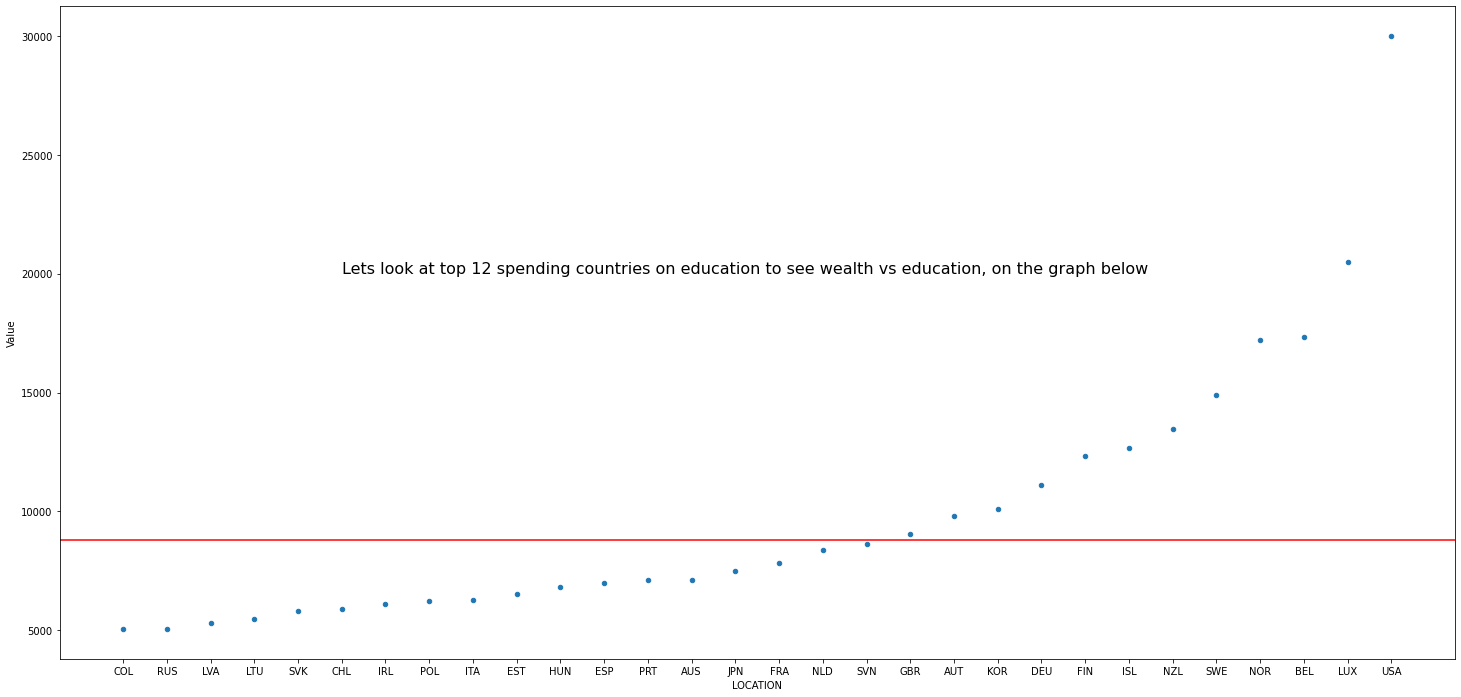

In [ ]:
Spending_df.plot(kind='scatter',x='LOCATION',y='Value')
                                                                                          #Average spending on education 
plt.text(5, 20000, r'Lets look at top 12 spending countries on education to see wealth vs education, on the graph below',fontsize=16) # Took top 12 countries, and checked their wealth below, on a bar graph 

plt.axhline(y=8783.724666666667, color='r')   

#Solution 4:  Wealthy nations make alot of investments in education so should Venzuela but within its limits.

### **List Top 12 Countries and List for Later**

In [ ]:
Spending_df.tail(12)              # Similar data cleanse as before, when you tail in this situtation it gives you the top 12 countries for educational spending 
Spending_df=Spending_df.tail(12)
Spending_df

,LOCATION,Value
148,GBR,9048.388
94,AUT,9824.383
72,KOR,10108.948
108,DEU,11121.506
104,FIN,12332.219
40,ISL,12670.652
130,NZL,13465.562
142,SWE,14917.142
132,NOR,17224.679
44,BEL,17320.185


In [ ]:
Top_12 = list(Spending_df["LOCATION"]) # Listing Top 12 spending countries on education, see its wealth 
Top_12

['GBR',
 'AUT',
 'KOR',
 'DEU',
 'FIN',
 'ISL',
 'NZL',
 'SWE',
 'NOR',
 'BEL',
 'LUX',
 'USA']

### **Create a GDP Per Capita Dataframe from the Top 12 List and Graph**

In [ ]:
df2 = pd.read_csv("/content/DP_LIVE_25102020054342653.csv")                               # This is creating the same lines as before but using one cell, creates top 12 countries GDP per capita 
df2.drop(columns=['INDICATOR',"SUBJECT","MEASURE", 'FREQUENCY','TIME',"Flag Codes"])
df2=df2.drop(columns=['INDICATOR',"SUBJECT","MEASURE", 'FREQUENCY','TIME',"Flag Codes"])
df2.sort_values(by=['Value'], inplace=True)
df2.drop_duplicates(subset=['LOCATION'])
df2=df2.drop_duplicates(subset=['LOCATION'])
df2 = df2.set_index( "LOCATION", drop = False) 
df2.loc[Top_12]
Top_12_GRAPH=df2.loc[Top_12]
Top_12_GRAPH                                                                              # Now dataframe for top 12 educational spending countries has GDP per capita dataframe 

,LOCATION,Value
LOCATION,,
GBR,GBR,42522.183841
AUT,AUT,49955.456118
KOR,KOR,37907.460937
DEU,DEU,47622.331224
FIN,FIN,42501.611531
ISL,ISL,48856.560901
NZL,NZL,37403.074775
SWE,SWE,49116.236552
NOR,NOR,58917.288330


Text(1, 80000, 'Red line= Mean GDP per capita (Top 30 Richest Countries )')

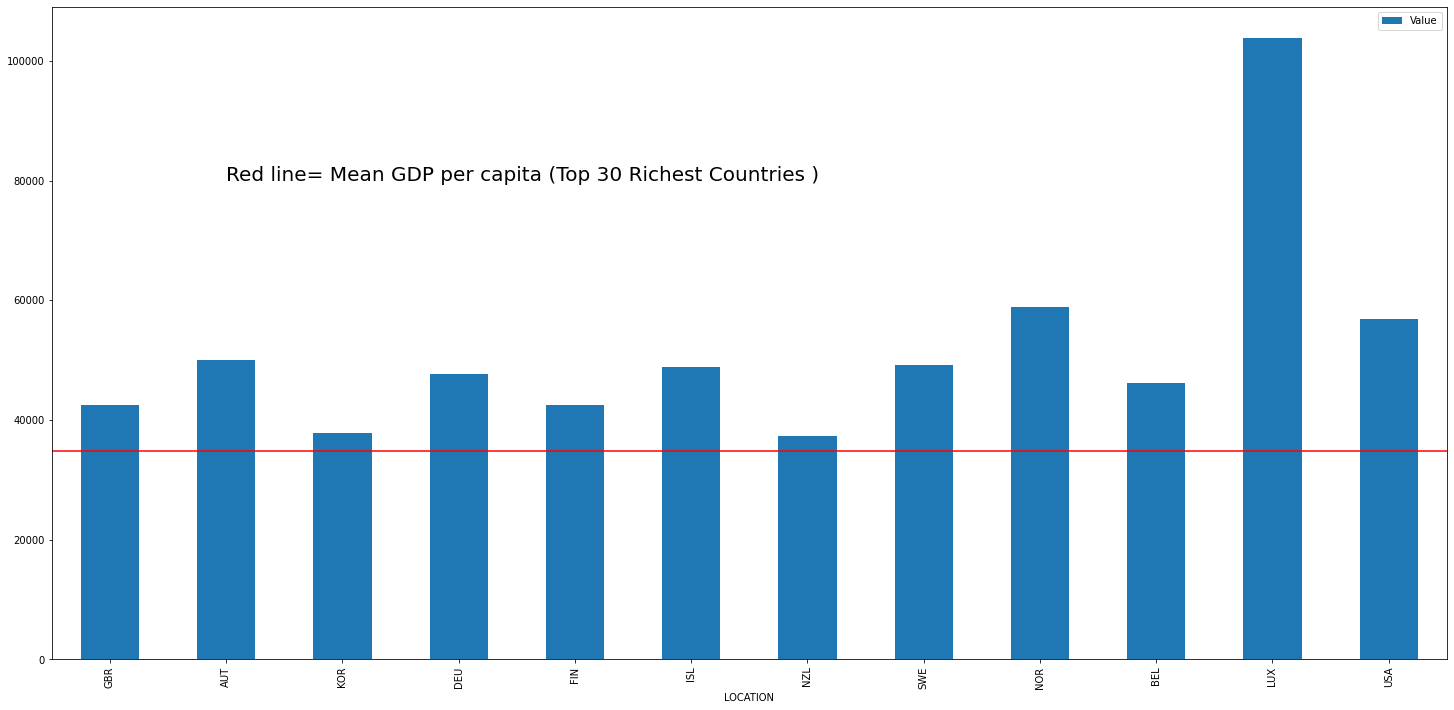

In [ ]:
Top_12_GRAPH.plot(kind='bar',x='LOCATION',y='Value')                       # Created graph from dataframe beforehand 
plt.axhline(y=34819.430959, color='r')                                     # Mean GDP per capita 

plt.text(1, 80000, r'Red line= Mean GDP per capita (Top 30 Richest Countries )',fontsize=20)   #Sort of a legend for the reader reads 'Red line= Mean GDP per capita (World)'

##**3.What are the economic deficiencies?**





###HyperInflation
**Economic Deficiency #1**: Hyperinflation is described as a inflation rate of over 12,000 percent. The country reached that point in 2018. 

In [ ]:
import plotly.express as px                                        # This is very similar to the bar graph interactive, however not is a line. Like before, font sizes are increased when needed. 
fig = px.line(long_df_Inflation, x="Years", y="Inflation Rate")

fig.update_layout(
    autosize=False,
    width=1500,
    height=800,)

fig.update_layout(
legend=go.layout.Legend(
x=0,
y=1,
traceorder="normal",
font=dict(
family="sans-serif",
size=20,
color="black"
)
)
)

fig.update_layout(title_text="Venzuela Inflation Rate", title_x=0.5)


fig.show()

###Shrinking Economy 

**Economic Deficiency #2:** Shrinking Economy and High Poverty Rate- Compared to neighboring countries, Venezuela is not doing well. They have a shrinking economy since 2015, whereas other close countries have a mostly growing economy. This needs to be addressed. 

In [ ]:
import plotly.express as px                                                                         # Chose plotly for interactive graph 
fig = px.bar(long_df_Countries, x="Years", y="GDP Percentage Growth", color= "Country")             # Taken from dataframe 

fig.update_layout(                                                                                  # Increase size of graph, increasing legend size, and some font size                                                            
    autosize=False,
    width=1500,
    height=800,)

fig.update_layout(
legend=go.layout.Legend(
x=0,
y=1,
traceorder="normal",
font=dict(
family="sans-serif",
size=20,
color="black"
)
)
)

fig.update_layout(title_text="Venezuela's Shrinking Economy vs Neighboring Countries", title_x=0.5) # Add title "Venezuela's Shrinking Economy vs Neighboring Countries"



fig.show()


###High Poverty Rate 


**Economic Deficiency #3:** Shrinking Economy and High Poverty Rate- Venezuela's poverty rate is well above the world average 

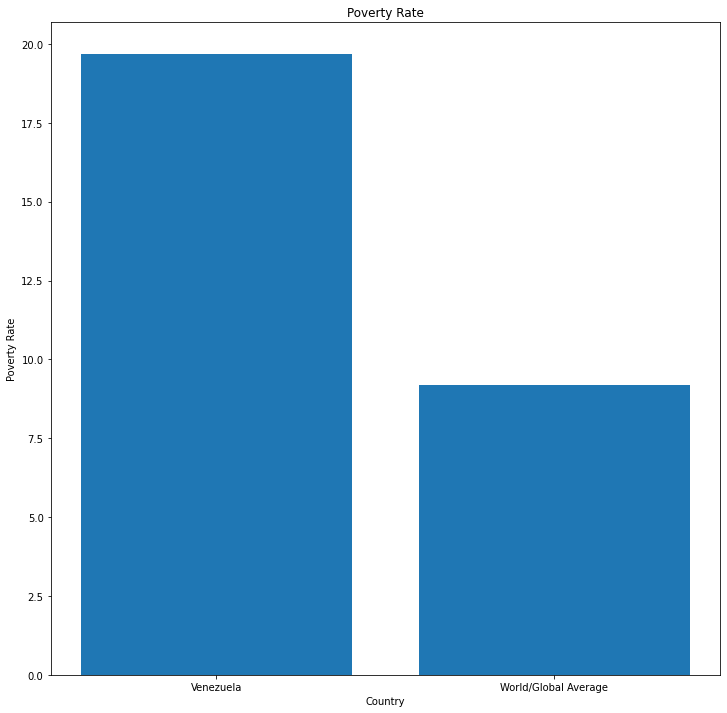

In [ ]:
Poverty_Rate  = [19.7,9.2]                       #https://www.worldbank.org/en/topic/poverty/overview#:~:text=The%20global%20extreme%20poverty%20rate,%245.50%20a%20day%20in%202017
Country = ["Venezuela",	"World/Global Average"]  # Made my own dataframe, only needed two data points, no need for web scarping and csv, data is based off above link  
Poverty_Rate

fig, ax = plt.subplots(figsize=(12,12))

ax.bar(Country, Poverty_Rate)
ax.set_title("Poverty Rate")
ax.set_xlabel("Country")
ax.set_ylabel("Poverty Rate")

fig.show()

###Decline of International Trade 

**Economic Deficiency #4:** Decline of international trade- Imports have dropped over the past five years 

Text(3, 4, 'U.S Sanctions')

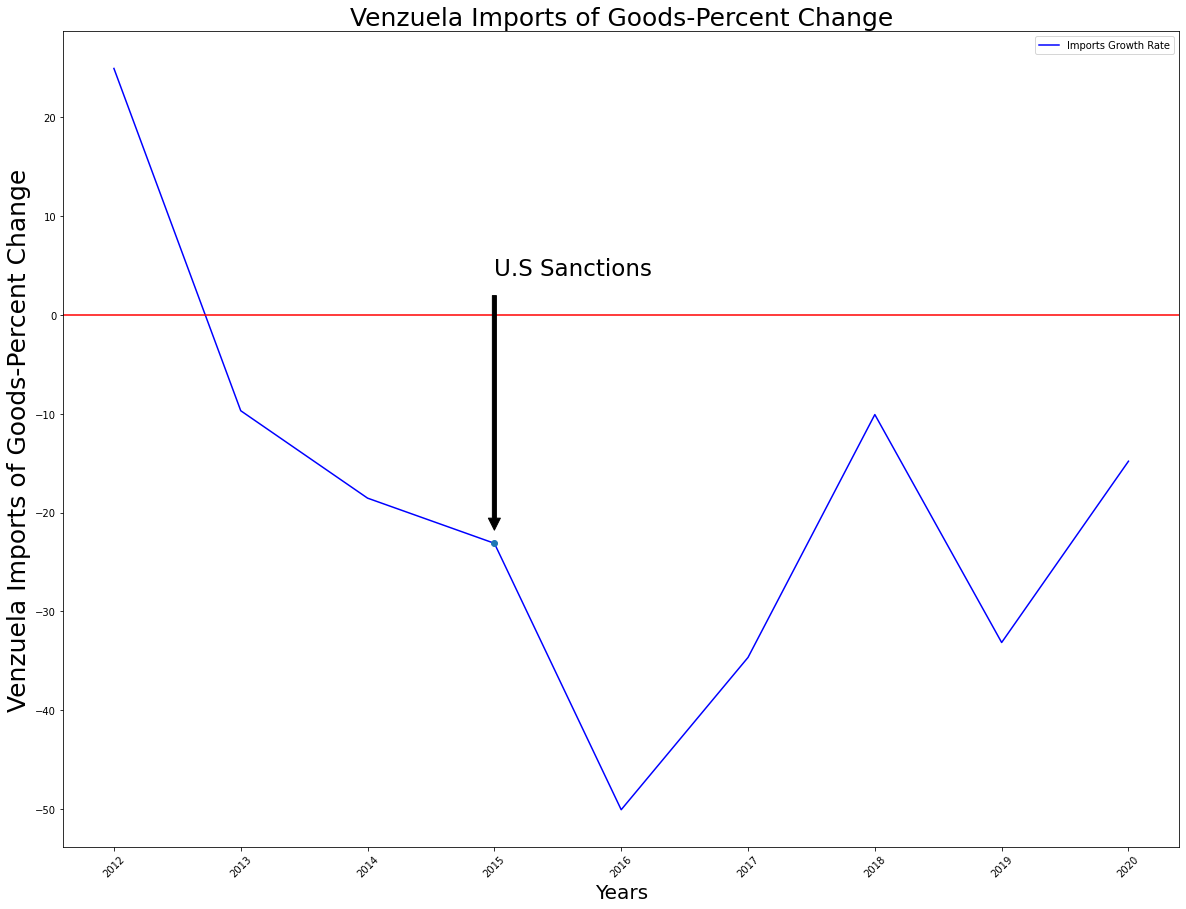

In [ ]:
import numpy as np
fig, ax = plt.subplots(figsize=(20,15))
ax.set_ylabel("Venzuela Imports of Goods-Percent Change",fontname="Arial", fontsize=25)
ax.set_xlabel("Years",fontname="Arial", fontsize=20)
ax.set_title("Venzuela Imports of Goods-Percent Change",fontname="Arial", fontsize=25)
long_df.plot(kind="line",x="Years",y="Imports Growth Rate", legend= "GDP Percentage Growth", color="b", rot=45, ax = ax)


plt.axhline(y=0, color='r')                                               # I think inserting the x-axis is helpful 


ax.plot([3], [-23.102], 'o')                                              # Create annoations to identify U.S Sanctions 
ax.annotate('U.S Sanctions' ,fontsize=23, xy=(3, -23.102), xytext=(3, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))




**Sanctions hurt imports for Venzuela.**

##**4. Solutions for economic problem areas.** 

###Solution 1:Attempt to Remove Sanctions 

**Solution #1:** Venezuela needs to remove U.S sanctions, and other sanctions from around the world. The sanctions are a function of a unstable political system. This a problem that presents itself in a significant way when looking at the data but it is an inherently poltical problem. Promote poltical stability by promoting free and fair elections, and sanctions will start to dwindle and go away as a result.

Text(3, 4, 'U.S Sanctions')

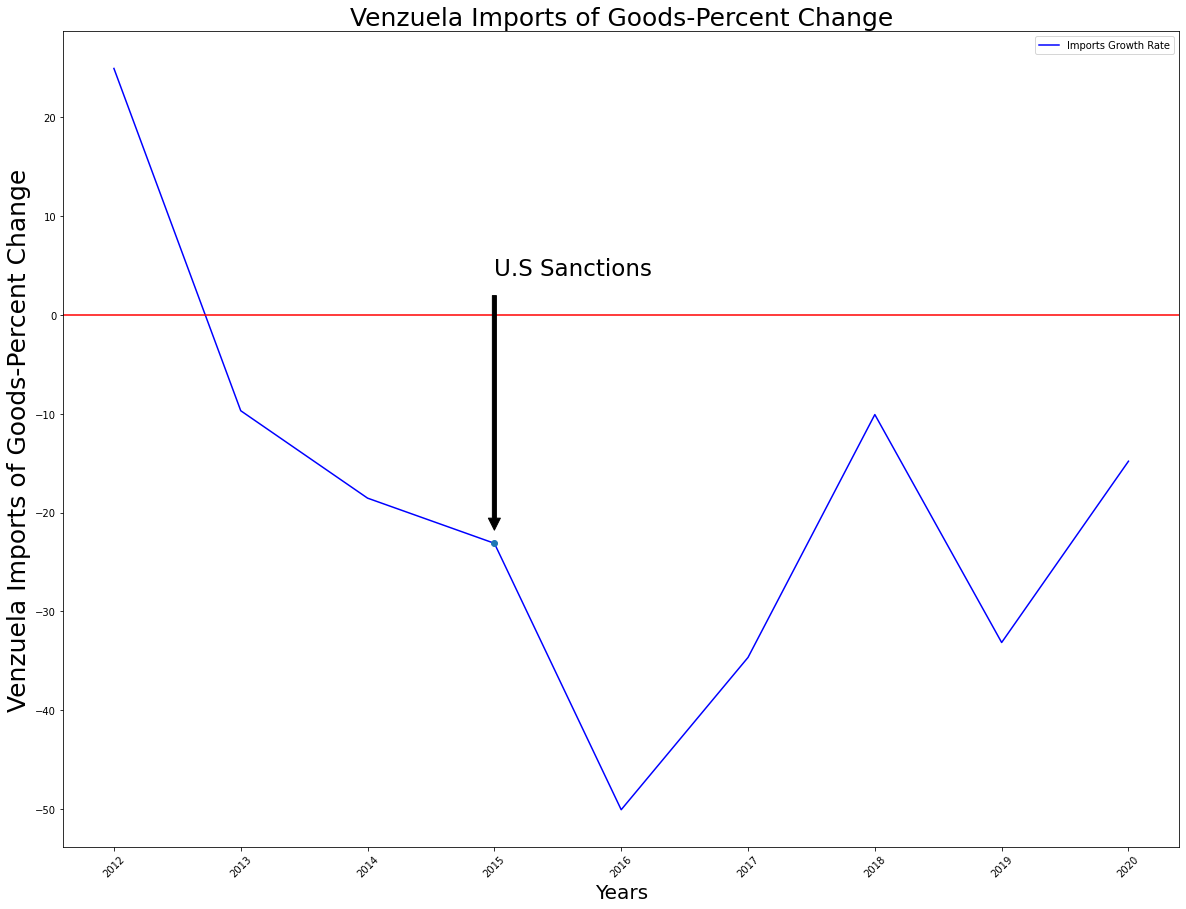

In [ ]:
import numpy as np
fig, ax = plt.subplots(figsize=(20,15))
ax.set_ylabel("Venzuela Imports of Goods-Percent Change",fontname="Arial", fontsize=25)
ax.set_xlabel("Years",fontname="Arial", fontsize=20)
ax.set_title("Venzuela Imports of Goods-Percent Change",fontname="Arial", fontsize=25)
long_df.plot(kind="line",x="Years",y="Imports Growth Rate", legend= "GDP Percentage Growth", color="b", rot=45, ax = ax)


plt.axhline(y=0, color='r')                                               # I think inserting the x-axis is helpful 


ax.plot([3], [-23.102], 'o')                                              # Create annoations to identify U.S Sanctions 
ax.annotate('U.S Sanctions' ,fontsize=23, xy=(3, -23.102), xytext=(3, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))


###Solution 2: Reduce government money printing to fight inflation. 

**Solution #2:** Stop high rate of government money printing. The rate in which money printing increased was substantial once Nicolas Maduro was elected. This is where it becomes complicated, Maduro has not stopped massive bolivar money printing and his people has suffered as a result. He needs to let the democratic process take place to have him unseated or he needs to intiate a more moderate printing strategy. A high rate of government money printing causes inflation. 

Text(0.1, 60000, 'Increase in money supply= Inflation')

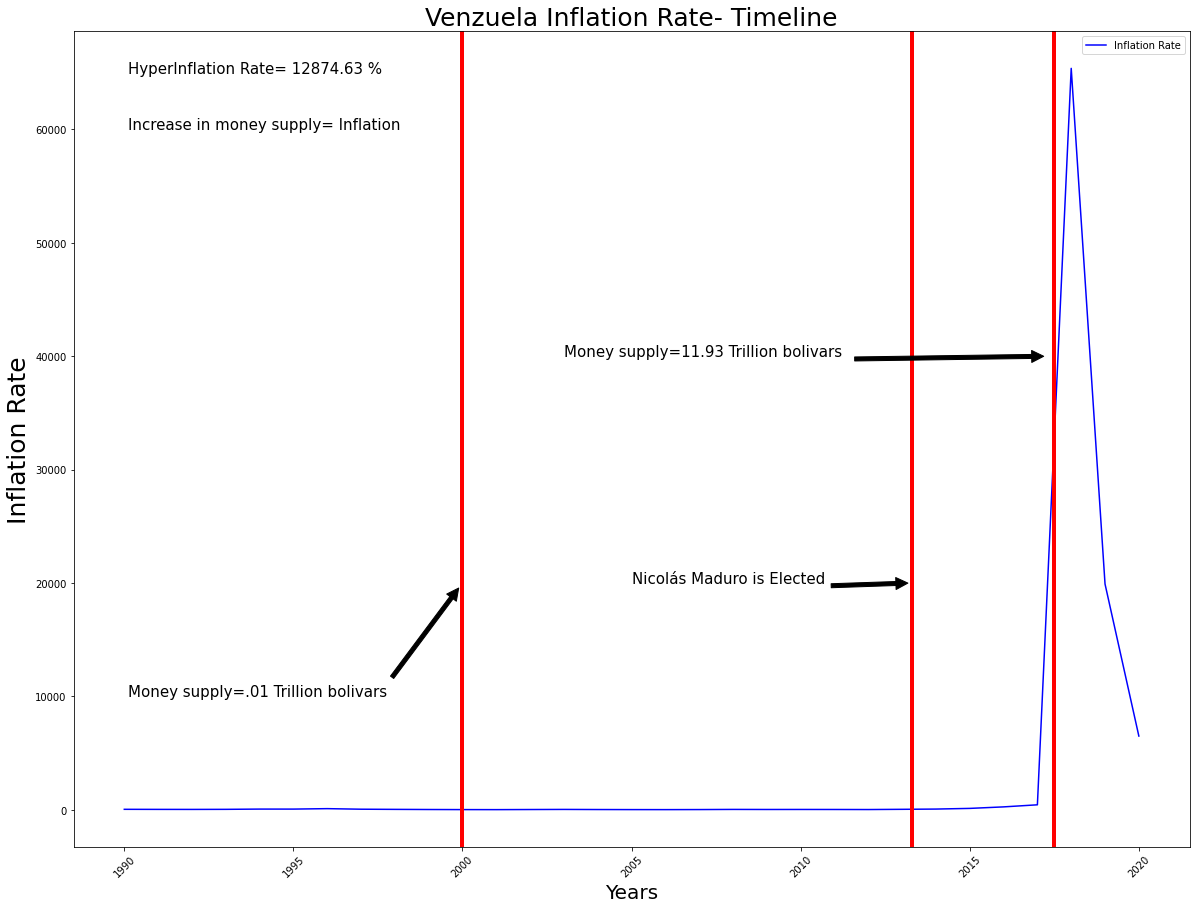

In [ ]:
#http://fingfx.thomsonreuters.com/gfx/rngs/VENEZUELA-ECONOMY/010040800HY/index.html


fig, ax = plt.subplots(figsize=(20,15))                          # This graph is not interactive I made it timelined to show how money supply causes inflation to go up 
ax.set_ylabel("Inflation Rate",fontname="Arial", fontsize=25)    # Font size increase 
ax.set_xlabel("Years",fontname="Arial", fontsize=20)
ax.set_title("Venzuela Inflation Rate- Timeline",fontname="Arial", fontsize=25)
long_df_Inflation.plot(kind='line',x='Years',y='Inflation Rate', legend= "GDP Percentage Growth", color="b", rot=45, ax = ax) # This plots the dataframe created from the pivot, money supply data based on link above  

plt.axvline(x=23.3,linewidth=4, color='r')

plt.axvline(x=27.5,linewidth=4, color='r')

plt.axvline(x=10,linewidth=4, color='r')

ax.annotate('Nicolás Maduro is Elected' ,fontsize=15, xy=(23.3, 20000), xytext=(15, 20000),            # Timelined Maduro using line inserted 
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('Money supply=11.93 Trillion bolivars' ,fontsize=15, xy=(27.5, 40000), xytext=(13, 40000), # Timelined Money supply is very high using line inserted
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('Money supply=.01 Trillion bolivars' ,fontsize=15, xy=(10, 20000), xytext=(.1, 10000),     # Timelined Money supply is very low using line inserted
            arrowprops=dict(facecolor='black', shrink=0.05))
       
plt.text(.1, 65000, r'HyperInflation Rate= 12874.63 %' ,fontsize=15)                                   # Shows hyperinflation rate 

plt.text(.1, 60000, r'Increase in money supply= Inflation' ,fontsize=15)                               # Shows "Increase in money supply= Inflation"

###Solution 3:Diversify economy beyond oil exports.

**Solution #3:** Venezuela lacks diversity in its exports. It is too depedent on oil. Oil price fluctuations have led to economic recessions across Venezuela's history. Work to remedy that with additional educational spending. 

([<matplotlib.patches.Wedge at 0x7f3aed695e48>,
 [Text(-0.49938947630209474, -0.9801072140121813, 'Petrolum'),
  Text(0.6741976190487652, 0.8691706221847216, 'Gold'),
  Text(0.33991851505592985, 1.0461622260061638, 'Alcohol'),
  Text(0.1378663750450849, 1.0913261944221482, 'Other')],
 [Text(-0.27239425980114257, -0.5346039349157352, '85.00%'),
  Text(0.367744155844781, 0.47409306664621176, '9.00%'),
  Text(0.18541009912141626, 0.5706339414579075, '2.00%'),
  Text(0.07519984093368266, 0.5952688333211716, '4.00%')])

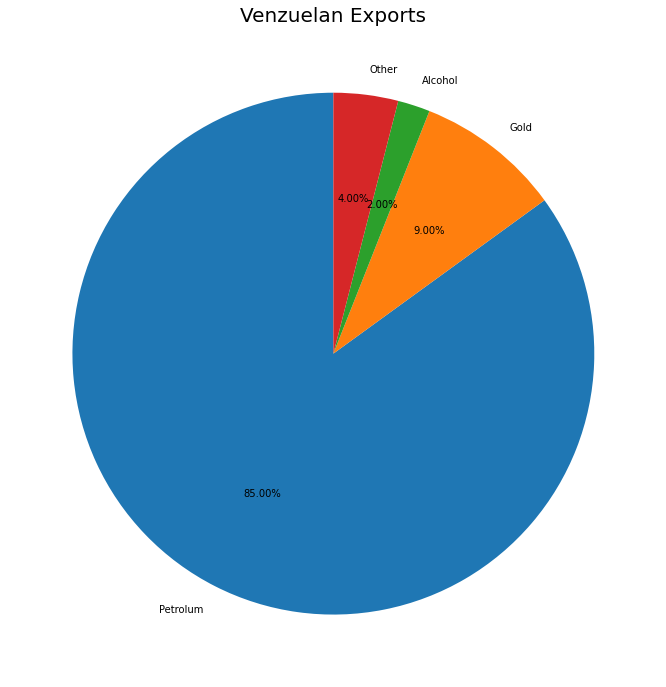

In [ ]:
Exports = ['Petrolum', 'Gold', 'Alcohol', 'Other']
Export_1 = [85,9,2,4] #https://oec.world/en/profile/country/ven/

fig, ax = plt.subplots(figsize=(12,12)) # Made my own piechart , only needed a few data points, no need for web scarping and csv
ax.set_title("Venzuelan Exports", fontsize=20)
ax.pie(x=Export_1, labels=Exports, startangle=90,autopct='%.2f%%')

###Solution 4: To diversify, increase educational investments. 

**Solution #4:** Many countries that spend a substantial on education reap its benefits with substantial wealth per capita. Graphs showed this relationship earlier.  Some of solutions will only come after political stability is established. To alleviate these problems spend more education, reduce money printing, and work with nations to remove trade sanctions. 

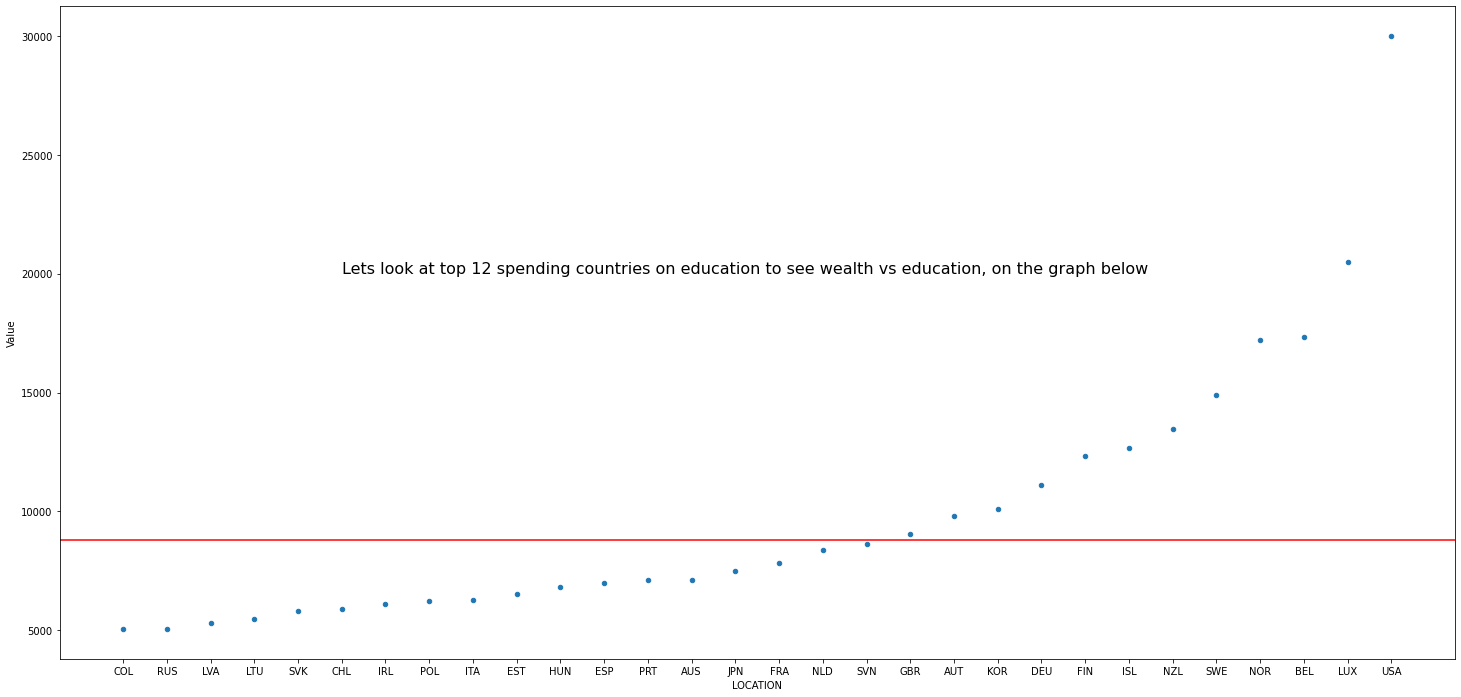

In [ ]:
Spending_df=Education_df.tail(30)
Spending_df

Spending_df.plot(kind='scatter',x='LOCATION',y='Value')
                                                                                          #Average spending on education 
plt.text(5, 20000, r'Lets look at top 12 spending countries on education to see wealth vs education, on the graph below',fontsize=16) # Took top 12 countries, and checked their wealth below, on a bar graph 

plt.axhline(y=8783.724666666667, color='r')   

#Solution 4:  Wealthy nations make alot of investments in education so should Venzuela but within its limits.

Text(1, 80000, 'Red line= Mean GDP per capita (Top 30 Richest Countries )')

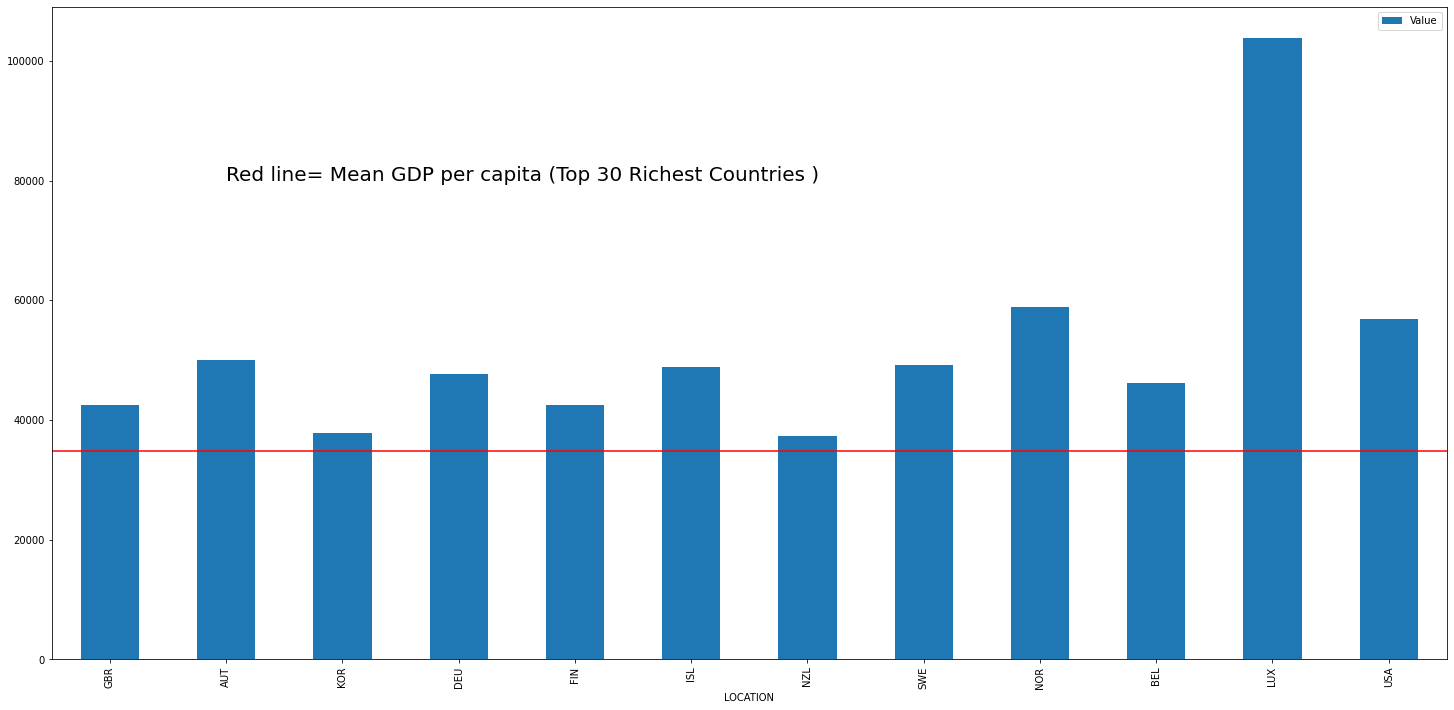

In [ ]:
Top_12_GRAPH.plot(kind='bar',x='LOCATION',y='Value')                       # Created graph from dataframe beforehand 
plt.axhline(y=34819.430959, color='r')                                     # Mean GDP per capita 

plt.text(1, 80000, r'Red line= Mean GDP per capita (Top 30 Richest Countries )',fontsize=20)   #Sort of a legend for the reader reads 'Red line= Mean GDP per capita (World)'



##**5. Conclusion**

The metrics tell a stark story of Venezuela. The following is a summary of its economic deficiencies and possible solutions using the available data within this data science project. 


**Economic Deficiency #1**: **Hyperinflation** is described as a inflation rate of over 12,000 percent. The country reached that point in 2018. 

**Solution #1:** Stop high rate of government money printing. The rate in which money printing increased was substantial once Nicolas Maduro was elected. This is where it becomes complicated, Maduro has not stopped massive bolivar money printing and his people has suffered as a result. He needs to let the democratic process take place to have him unseated or he needs to intiate a more moderate printing strategy. A high rate of government money printing causes inflation. 

**Economic Deficiency #2:** **Shrinking Economy and High Poverty Rate**- Compared to neighboring countries, Venezuela is not doing well. They have a shrinking economy since 2015, whereas other close countries have a mostly growing economy. This needs to be addressed. 

**Solution #2:** Many of solutions here will help here. This deficiency requires many remedies. For example Venezuela needs; to reduce substantial money printing, remove sanctions to increase trade and revive imports, and invest in education for economic diversification. 

Many countries that spend a substantial on education reap its benefits with substantial wealth per capita. Graphs showed this relationship earlier.  Some of solutions will only come after political stability is established. To alleviate these problems spend more education, reduce money printing, and work with nations to remove trade sanctions. 


**Economic Deficiency #3:** **Decline of international trade**- Imports have dropped over the past five years 

**Solution #3:** Venezuela needs to remove U.S sanctions, and other sanctions from around the world. The sanctions are a function of a unstable political system. This a problem that presents itself in a significant way when looking at the data but it is an inherently poltical problem. Promote poltical stability by promoting free and fair elections, and sanctions will start to dwindle and go away as a result. 

